In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.image as mpimg
%matplotlib inline

In [11]:

from keras.layers import Dense, Flatten, Activation, MaxPooling2D, Lambda, Dropout
from keras.models import Sequential
from keras.layers.core import Lambda
from keras.layers import Conv2D, Cropping2D 
from keras.optimizers import SGD, Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

In [12]:
# generator

# read the csv file
driving_df = pd.read_csv('data/driving_log.csv')

In [8]:
driving_df.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [13]:
images_filenames = []
measurements = [] 

for index, row in driving_df.iterrows():
    filename = row['center'][4:]
    images_filenames.append(filename)
    measurement = float(row['steering'])
    measurements.append(measurement)
    

In [5]:
print(measurements[200])
print(images_filenames[1500])

0.0
center_2016_12_01_13_35_10_270.jpg


In [6]:
flips_filenames = []
for each in images_filenames:
    flips_filenames.append('f'+each)
    
flips_filenames = np.asarray(flips_filenames)

print(flips_filenames[10])
#X_train_merged = np.append(X_train, )
print(len(flips_filenames))

flips_measurements = - np.asarray(measurements)

fcenter_2016_12_01_13_31_13_786.jpg
8036


In [7]:
# merge

filenames_merged = np.append(images_filenames, flips_filenames)
measurements_merged = np.append(measurements, flips_measurements)

In [13]:
len(filenames_merged)

16072

In [8]:
#print(len(images_filenames))
#gray = plt.imshow(images[0], cmap='gray')
#plt.imsave('gray_sample.jpg', gray)

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(filenames_merged, measurements_merged, test_size=0.25, random_state=101)

In [ ]:
# augmentation

# already done grayscale
# normalization
#def normalize_pixels(data):
#    return (data.astype(float) - 128) / 128
    
#X_train_norm = normalize_pixels(np.asarray(X_train))
#X_valid_norm = normalize_pixels(np.asarray(X_valid))
#X_test_norm = normalize_pixels(np.asarray(X_test))

# create the generator to perform online data augmentation
#image_generator = ImageDataGenerator(
#                                horizontal_flip = True)
#                                zoom_range = 0.1)
#                                rotation_range = 10)
#                                width_shift_range=0.2,
#                                height_shift_range=0.2)

# flip images horizontally to solve left turn bias
#print(X_train[0])
def flip_images(data):
    #flipped_filenames = []
    count = 0
    for i in range(0, len(data)):
        filename = data[i]
        current_path = 'data/IMG/' + filename
        image = mpimg.imread(current_path)
        #plt.imshow(image)
        flipped_image = np.fliplr(image)
        plt.imshow(flipped_image)
        # save image to 'data/IMG/'
        plt.imsave('data/IMG2/'+filename, flipped_image)
        plt.close('all')
        if i%200 == 0:
            print("200 processed")
            print("count: "+str(count))
        count += 1
        #print(filename)
        #plt.savefig('data/IMG/'+'f'+filename)
        
flip_images(images_filenames)



200 processed
count: 0
200 processed
count: 200
200 processed
count: 400
200 processed
count: 600
200 processed
count: 800
200 processed
count: 1000
200 processed
count: 1200
200 processed
count: 1400
200 processed
count: 1600
200 processed
count: 1800
200 processed
count: 2000
200 processed
count: 2200
200 processed
count: 2400
200 processed
count: 2600
200 processed
count: 2800
200 processed
count: 3000
200 processed
count: 3200
200 processed
count: 3400
200 processed
count: 3600
200 processed
count: 3800
200 processed
count: 4000
200 processed
count: 4200


In [16]:
#current_path = 'data/IMG/' + 'f'+X_train[1]
#image = mpimg.imread(current_path)
#plt.imshow(image)
print(len(X_train))

12054


(160, 320, 3)

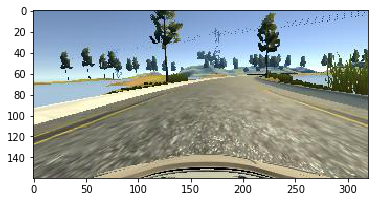

In [9]:
# merge flips images and original images
#d = np.append(a, b, axis=0)
# create flips images filenames

#flips_filenamess = 'f'+ x for x in X_train
#function = lambda x: ('f'+x for x in X_train)

#flips_filenames = X_train.apply(function)
'''
current_path = 'data/IMG/' + 'center_2016_12_01_13_46_01_135.jpg'
image = mpimg.imread(current_path)
flipped_image = np.fliplr(image)
plt.imshow(flipped_image)
plt.imsave('center_2016_12_01_13_46_01_135.jpg', flipped_image)
flipped_image.shape
'''


In [18]:
print(len(y_train)) 
print(X_train[10000])
print(y_train[10000])

12054
fcenter_2016_12_01_13_46_01_135.jpg
-0.0


data/IMG2/fcenter_2016_12_01_13_36_55_645.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_45_43_091.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_41_53_675.jpg
(288, 432, 3)
data/IMG2/center_2016_12_01_13_35_54_997.jpg
(160, 320, 3)
data/IMG2/fcenter_2016_12_01_13_33_15_948.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_41_07_076.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_42_56_466.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_43_33_789.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_34_23_644.jpg
(288, 432, 3)
data/IMG2/center_2016_12_01_13_39_19_327.jpg
(160, 320, 3)
data/IMG2/fcenter_2016_12_01_13_37_17_891.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_35_38_405.jpg
(288, 432, 3)
data/IMG2/center_2016_12_01_13_46_05_899.jpg
(160, 320, 3)
data/IMG2/fcenter_2016_12_01_13_45_35_282.jpg
(288, 432, 3)
data/IMG2/center_2016_12_01_13_44_41_015.jpg
(160, 320, 3)
data/IMG2/fcenter_2016_12_01_13_35_01_956.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_42_43_898.jp

data/IMG2/fcenter_2016_12_01_13_38_45_636.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_37_25_495.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_43_09_950.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_35_01_245.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_46_12_284.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_41_17_719.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_39_21_053.jpg
(288, 432, 3)
data/IMG2/center_2016_12_01_13_43_17_745.jpg
(160, 320, 3)
data/IMG2/center_2016_12_01_13_34_23_339.jpg
(160, 320, 3)
data/IMG2/fcenter_2016_12_01_13_32_41_841.jpg
(288, 432, 3)
data/IMG2/center_2016_12_01_13_46_25_735.jpg
(160, 320, 3)
data/IMG2/center_2016_12_01_13_46_02_453.jpg
(160, 320, 3)
data/IMG2/fcenter_2016_12_01_13_38_33_578.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_36_55_645.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_45_43_091.jpg
(288, 432, 3)
data/IMG2/fcenter_2016_12_01_13_41_53_675.jpg
(288, 432, 3)
data/IMG2/center_2016_12_01_13_35_54_997.jpg

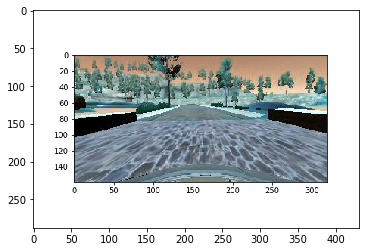

In [26]:
def generator(X_data, y_data, batch_size):
    
    num_samples = len(X_data)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_x = []
            batch_y = []
            X_data_range, y_data_range = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
            if len(X_data_range) < batch_size:
                break
            for i in range(0, batch_size):
                filename = X_data_range[i]
                current_path = 'data/IMG2/' + filename
                print(current_path)
                batch_x_one = cv2.imread(current_path)
                print(batch_x_one.shape)
                if batch_x_one is None:
                    print("null")
                plt.imshow(batch_x_one)
                batch_x_one = cv2.cvtColor(batch_x_one, cv2.COLOR_BGR2GRAY)
                batch_x_one = np.expand_dims(batch_x_one[:, :], 2)
                batch_x.append(batch_x_one)
                batch_y.append(y_data_range[i])
        #batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            batch_x = np.asarray(batch_x)
            #batch_x = batch_x.reshape(-1, 160, 320, 3)
            batch_y = np.asarray(batch_y)
            batch_x, batch_y = shuffle(batch_x, batch_y)
            yield batch_x, batch_y
    
batch_x, batch_y = next(generator(X_train, y_train, 32))


In [20]:
batch_size = 32
epochs = 10

In [21]:
#X_train_merged, y_train_merged = shuffle(X_train_merged, y_train_merged)
train_generator = generator(X_train, y_train, batch_size)
valid_generator = generator(X_valid, y_valid, batch_size)

In [22]:
#plt.imshow(batch_x[31], cmap='gray')
print(len(batch_x))
print(len(batch_x[0]))
print(batch_x[0].shape)

32
288
(288, 432, 1)


In [23]:
adam = Adam(lr=0.000001, beta_1=0.9, beta_2=0.999)
len(y_train)


12054

In [24]:
model = Sequential()

# crop the some of the top and bottom to make image more relevant
#model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,1)))

# doing the normalizaton
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,1)))
#model.add(Cropping2D(cropping=((50,20), (0,0))))
# convolution layer 1, with input: x1 output: x24
model.add(Conv2D(filters=8, kernel_size=(5, 5), padding='same', subsample=(2, 2)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
# maxpooling layer 1, with input: x24 output: x24
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
# convolution layer 2, with input: x24, output: x36
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', subsample=(2, 2)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
# maxpooling layer 2, with input: x36 output: x36
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
# convolution layer 3, with input: x36, output: x48
model.add(Conv2D(filters=48, kernel_size=(5, 5), padding='same', subsample=(2, 2)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
# maxpooling layer 3, with input: x48, output: x48
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
# flatten the inputs, prepared for the fully connected layer
model.add(Flatten())
# fully connected layer 1, with input x48, output: 1024
model.add(Dense(1024))
#model.add(BatchNormalization())
model.add(Activation('relu'))
# apply regularization, with a dropout probability of 50%
model.add(Dropout(0.5))
# fully connected layer 2, with input 1024, output: 256
model.add(Dense(256))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dense(128))
#model.add(Activation('relu'))
# output layer, with input: 256, output 1
model.add(Dense(1))

model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 160, 8)        208       
_________________________________________________________________
activation_1 (Activation)    (None, 80, 160, 8)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 79, 159, 8)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 80, 16)        3216      
_________________________________________________________________
activation_2 (Activation)    (None, 40, 80, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 39, 79, 16)        0         
__________

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=8, kernel_size=(5, 5), padding="same", strides=(2, 2))`
  # Remove the CWD from sys.path while we load stuff.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=16, kernel_size=(5, 5), padding="same", strides=(2, 2))`
  app.launch_new_instance()
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=48, kernel_size=(5, 5), padding="same", strides=(2, 2))`


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if __name__ == '__main__':
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=12054, validation_data=<generator..., validation_steps=125.5625, verbose=1, shuffle=True, epochs=10)`
  if __name__ == '__main__':


Epoch 1/10
data/IMG2/fcenter_2016_12_01_13_36_55_645.jpg
data/IMG2/fcenter_2016_12_01_13_38_51_228.jpg
data/IMG2/fcenter_2016_12_01_13_45_43_091.jpg
data/IMG2/fcenter_2016_12_01_13_41_53_675.jpg
data/IMG2/center_2016_12_01_13_35_54_997.jpg
data/IMG2/fcenter_2016_12_01_13_33_15_948.jpg
data/IMG2/fcenter_2016_12_01_13_41_07_076.jpg
data/IMG2/fcenter_2016_12_01_13_42_56_466.jpg
data/IMG2/fcenter_2016_12_01_13_43_33_789.jpg
data/IMG2/fcenter_2016_12_01_13_34_23_644.jpg
data/IMG2/center_2016_12_01_13_39_19_327.jpg
data/IMG2/fcenter_2016_12_01_13_37_17_891.jpg
data/IMG2/fcenter_2016_12_01_13_35_38_405.jpg
data/IMG2/center_2016_12_01_13_46_05_899.jpg
data/IMG2/fcenter_2016_12_01_13_45_35_282.jpg
data/IMG2/center_2016_12_01_13_44_41_015.jpg
data/IMG2/fcenter_2016_12_01_13_35_01_956.jpg
data/IMG2/fcenter_2016_12_01_13_42_43_898.jpg
data/IMG2/fcenter_2016_12_01_13_45_14_835.jpg
data/IMG2/center_2016_12_01_13_44_01_013.jpg
data/IMG2/fcenter_2016_12_01_13_38_45_636.jpg


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


data/IMG2/fcenter_2016_12_01_13_37_25_495.jpg
data/IMG2/fcenter_2016_12_01_13_43_09_950.jpg
data/IMG2/fcenter_2016_12_01_13_35_01_245.jpg
data/IMG2/fcenter_2016_12_01_13_46_12_284.jpg
data/IMG2/fcenter_2016_12_01_13_41_17_719.jpg
data/IMG2/fcenter_2016_12_01_13_39_21_053.jpg
data/IMG2/center_2016_12_01_13_43_17_745.jpg
data/IMG2/center_2016_12_01_13_34_23_339.jpg
data/IMG2/fcenter_2016_12_01_13_32_41_841.jpg
data/IMG2/center_2016_12_01_13_46_25_735.jpg
data/IMG2/center_2016_12_01_13_46_02_453.jpg
data/IMG2/fcenter_2016_12_01_13_38_33_578.jpg
data/IMG2/fcenter_2016_12_01_13_44_56_349.jpg
data/IMG2/fcenter_2016_12_01_13_37_16_773.jpg


ValueError: Error when checking input: expected lambda_1_input to have 4 dimensions, but got array with shape (32, 1)

data/IMG2/fcenter_2016_12_01_13_42_37_722.jpg
data/IMG2/fcenter_2016_12_01_13_39_48_531.jpg
data/IMG2/fcenter_2016_12_01_13_36_03_112.jpg
data/IMG2/fcenter_2016_12_01_13_34_33_081.jpg
data/IMG2/fcenter_2016_12_01_13_36_03_314.jpg
data/IMG2/center_2016_12_01_13_40_07_435.jpg
data/IMG2/fcenter_2016_12_01_13_41_28_665.jpg
data/IMG2/center_2016_12_01_13_34_51_719.jpg
data/IMG2/center_2016_12_01_13_34_59_321.jpg
data/IMG2/fcenter_2016_12_01_13_33_12_502.jpg
data/IMG2/fcenter_2016_12_01_13_44_07_701.jpg
data/IMG2/center_2016_12_01_13_34_25_262.jpg
data/IMG2/center_2016_12_01_13_46_36_366.jpg
data/IMG2/center_2016_12_01_13_46_26_244.jpg
data/IMG2/center_2016_12_01_13_38_35_096.jpg
data/IMG2/center_2016_12_01_13_34_58_105.jpg
data/IMG2/fcenter_2016_12_01_13_37_31_061.jpg
data/IMG2/fcenter_2016_12_01_13_44_21_174.jpg
data/IMG2/center_2016_12_01_13_42_22_724.jpg
data/IMG2/center_2016_12_01_13_41_27_957.jpg
data/IMG2/fcenter_2016_12_01_13_34_11_406.jpg
data/IMG2/center_2016_12_01_13_44_12_147.jpg

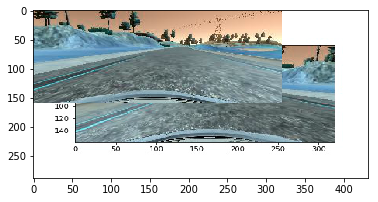

In [25]:

model.fit_generator(train_generator, 
                    samples_per_epoch=len(X_train), 
                    steps_per_epoch=len(X_train)/batch_size,
                    validation_data=valid_generator,
                    validation_steps=len(X_valid)/batch_size,
                    verbose=1,
                    shuffle=True,
                    nb_epoch=epochs)

In [ ]:
filename = 'fcenter_2016_12_01_13_37_56_368.jpg'
current_path = 'data/IMG2/' + filename
print(current_path)
x = cv2.imread(current_path)
plt.imshow(x)

In [ ]:
model.save('model2.h5')